In [516]:
#importing required libraries
import pandas as pd
import numpy as np

In [517]:
#loading train and test data sets
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [518]:
#checking first 5 rows in train data set
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [519]:
#checking first 5 rows in test data set
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [520]:
#checking column in training data set
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [625]:
train_df.shape

(1168, 80)

In [626]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1168 non-null   float64
 1   MSZoning              1168 non-null   float64
 2   LotFrontage           1168 non-null   float64
 3   LotArea               1168 non-null   float64
 4   Street                1168 non-null   float64
 5   Alley                 1168 non-null   float64
 6   LotShape              1168 non-null   float64
 7   LandContour           1168 non-null   float64
 8   Utilities             1168 non-null   float64
 9   LotConfig             1168 non-null   float64
 10  LandSlope             1168 non-null   float64
 11  Neighborhood          1168 non-null   float64
 12  Condition1            1168 non-null   float64
 13  Condition2            1168 non-null   float64
 14  BldgType              1168 non-null   float64
 15  HouseStyle           

In [521]:
#dropping ID column 
train_df=train_df.drop(['Id'],axis=1)
test_df=test_df.drop(['Id'],axis=1)

In [522]:
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)
        

In [523]:
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)


In [524]:
test_objcols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [525]:
train_numcols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [526]:
#checking whether the data types in both train and test data sets are similar or any discrepancies are present.
# initializing list and convert into set object
x = set(train_objcols)
y = set(test_objcols)
a=set(train_numcols)
b=set(test_numcols)

print("Missing object type column: " + str(y.difference(x)))
print("Missing numeric type column: " + str(b.difference(a)))



Missing object type column: set()
Missing numeric type column: {'PoolQC'}


Observation:
   
PoolQC is termed as numeric column in test data
so changing its data types

In [527]:
test_df['PoolQC']=test_df['PoolQC'].astype(str)

CHECKING FOR NULLS IN TRAIN DATA SET

In [528]:
#checking for nulls in object columns
for i in train_objcols:
    if(train_df[i].isnull().sum()!=0):
        print(i,":",train_df[i].isnull().sum())
    else:
        continue

Alley : 1091
MasVnrType : 7
BsmtQual : 30
BsmtCond : 30
BsmtExposure : 31
BsmtFinType1 : 30
BsmtFinType2 : 31
FireplaceQu : 551
GarageType : 64
GarageFinish : 64
GarageQual : 64
GarageCond : 64
PoolQC : 1161
Fence : 931
MiscFeature : 1124


In [529]:
#checking for nulls in numeric columns
for i in train_numcols:
    if(train_df[i].isnull().sum()!=0):
        print(i,":",train_df[i].isnull().sum())
    else:
        continue

LotFrontage : 214
MasVnrArea : 7
GarageYrBlt : 64


In [530]:
#checking the unique entries of each column
for i in range(len(train_objcols)):
    print(train_objcols[i],"\n","*************************\n",train_df[train_objcols[i]].value_counts())
    print("###########################################################")

MSZoning 
 *************************
 RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
###########################################################
Street 
 *************************
 Pave    1164
Grvl       4
Name: Street, dtype: int64
###########################################################
Alley 
 *************************
 Grvl    41
Pave    36
Name: Alley, dtype: int64
###########################################################
LotShape 
 *************************
 Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
###########################################################
LandContour 
 *************************
 Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
###########################################################
Utilities 
 *************************
 AllPub    1168
Name: Utilities, dtype: int64
###########################################################
LotConfig 

NOTE:
    
In data description,All the above object columns has 'NA' which means that the particular value is not present.
when checked for the unique entries we can see that there is no NA.
This indicates that the NA values might be mistakenly entred as NULL.

alley--if there is no alley access to property this might be null

bsmtqual,BsmtCond,BsmtExposure ,BsmtFinType1,BsmtFinType2 -- if there is no basement this might be chance are these columns are null.

FireplaceQu -- if no fireplace is present,this column can be null.
  
GarageType ,GarageFinish,GarageQual-- if there is no garage these columns can be null

poolQC- If no pool in the building this column can be null

fence-If no fence to the building this column can be null

miscfeatures- If there are no miscellaneous features,this can be null


In [531]:
#creating a list with names of object type columns which are null
objectcols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
           ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [532]:
#creating a list of numeric columns which has null values.
numeric_cols=['LotFrontage','GarageYrBlt','MasVnrArea']

In [533]:
#replacing null values with NA for all the object columns.
for i in range(len(objectcols)):
    train_df[objectcols[i]].replace(np.nan, 'Not Available',inplace=True)


In [534]:
from sklearn.impute import KNNImputer
#intializing imputer object
imputer=KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')

In [535]:
#performing imputation of null values in numeric columns
for n in numeric_cols:
    print("Before Imputing:",n,"::\n",train_df[n].describe())
    train_df[n]=imputer.fit_transform(train_df[[n]])
    print("\nAfter Imputing:",n,"::\n",train_df[n].describe())
    print("\n*********************************************")

Before Imputing: LotFrontage ::
 count    954.00000
mean      70.98847
std       24.82875
min       21.00000
25%       60.00000
50%       70.00000
75%       80.00000
max      313.00000
Name: LotFrontage, dtype: float64

After Imputing: LotFrontage ::
 count    1168.000000
mean       70.988470
std        22.437056
min        21.000000
25%        60.000000
50%        70.988470
75%        79.250000
max       313.000000
Name: LotFrontage, dtype: float64

*********************************************
Before Imputing: GarageYrBlt ::
 count    1104.000000
mean     1978.193841
std        24.890704
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

After Imputing: GarageYrBlt ::
 count    1168.000000
mean     1978.193841
std        24.198559
min      1900.000000
25%      1962.000000
50%      1978.193841
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

****************************

CHECKING FOR NULLS IN TEST DATA SET AND TREATING THEM

In [536]:
#checking for nulls in test data frame
for col in test_df.columns:
    if(test_df[col].isnull().sum()>0):
        print(col,":",test_df[col].isnull().sum(),"  Type:",test_df[col].dtype)
    else:
        continue

LotFrontage : 45   Type: float64
Alley : 278   Type: object
MasVnrType : 1   Type: object
MasVnrArea : 1   Type: float64
BsmtQual : 7   Type: object
BsmtCond : 7   Type: object
BsmtExposure : 7   Type: object
BsmtFinType1 : 7   Type: object
BsmtFinType2 : 7   Type: object
Electrical : 1   Type: object
FireplaceQu : 139   Type: object
GarageType : 17   Type: object
GarageYrBlt : 17   Type: float64
GarageFinish : 17   Type: object
GarageQual : 17   Type: object
GarageCond : 17   Type: object
Fence : 248   Type: object
MiscFeature : 282   Type: object


In [537]:
for i in test_df.columns:
    print(i,"\n","*************************\n",test_df[i].value_counts())
    print("###########################################################")

MSSubClass 
 *************************
 20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64
###########################################################
MSZoning 
 *************************
 RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
###########################################################
LotFrontage 
 *************************
 60.0     32
85.0     14
50.0     13
70.0     12
80.0      9
         ..
124.0     1
71.0      1
138.0     1
34.0      1
69.0      1
Name: LotFrontage, Length: 65, dtype: int64
###########################################################
LotArea 
 *************************
 7200     7
1680     4
7500     3
5400     3
8450     3
        ..
10335    1
14157    1
7599     1
8520     1
12800    1
Name: LotArea, Length: 249, dtype: int64
#########################################

In [538]:
#creating a list with names of object type columns which are null
objectcols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
           ,'GarageFinish','GarageQual','GarageCond','Fence','MiscFeature']
#creating a list of numeric columns which has null values.
numeric_cols=['LotFrontage','GarageYrBlt','MasVnrArea']

In [539]:
#replacing null values with NA for all the object columns.
for i in range(len(objectcols)):
    test_df[objectcols[i]].replace(np.nan, 'Not Available',inplace=True)


In [540]:
from sklearn.impute import KNNImputer
#intializing imputer object
imputer=KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')

In [541]:
#performing imputation of null values in numeric columns
for n in numeric_cols:
    print("Before Imputing:",n,"::\n",test_df[n].describe())
    test_df[n]=imputer.fit_transform(test_df[[n]])
    print("\nAfter Imputing:",n,"::\n",test_df[n].describe())
    print("\n*********************************************")

Before Imputing: LotFrontage ::
 count    247.000000
mean      66.425101
std       21.726343
min       21.000000
25%       53.500000
50%       65.000000
75%       79.000000
max      150.000000
Name: LotFrontage, dtype: float64

After Imputing: LotFrontage ::
 count    292.000000
mean      66.425101
std       19.975962
min       21.000000
25%       57.750000
50%       66.425101
75%       76.000000
max      150.000000
Name: LotFrontage, dtype: float64

*********************************************
Before Imputing: GarageYrBlt ::
 count     275.000000
mean     1979.760000
std        23.868875
min      1916.000000
25%      1964.000000
50%      1979.000000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

After Imputing: GarageYrBlt ::
 count     292.000000
mean     1979.760000
std        23.161183
min      1916.000000
25%      1965.000000
50%      1979.760000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

****************************

In [542]:
test_df['PoolQC'].replace('nan', 'Not Available',inplace=True)

In [543]:
train_df['MSSubClass']=train_df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
45:'1-1/2 STORY - UNFINISHED ALL AGES',
50:'1-1/2 STORY FINISHED ALL AGES',
60:'2-STORY 1946 & NEWER',
70:'2-STORY 1945 & OLDER',
75:'2-1/2 STORY ALL AGES',
80:'SPLIT OR MULTI-LEVEL',
85:'SPLIT FOYER',
90:'DUPLEX - ALL STYLES AND AGES',
120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
150:'1-1/2 STORY PUD - ALL AGES',
160:'2-STORY PUD - 1946 & NEWER',
180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
190:'2 FAMILY CONVERSION - ALL STYLES AND AGES' })

train_df['OverallQual']=train_df['OverallQual'].replace({10:'Very Excellent',
9:'Excellent',
8:'Very Good',
7:'Good',
6:'Above Average',
5:'Average',
4:'Below Average',
3:'Fair',
2:'Poor',
1:'Very Poor' })
train_df['OverallCond']=train_df['OverallCond'].replace({10:'Very Excellent',
9:'Excellent',
8:'Very Good',
7:'Good',
6:'Above Average',
5:'Average',
4:'Below Average',
3:'Fair',
2:'Poor',
1:'Very Poor' })

In [545]:
test_df['MSSubClass']=test_df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
45:'1-1/2 STORY - UNFINISHED ALL AGES',
50:'1-1/2 STORY FINISHED ALL AGES',
60:'2-STORY 1946 & NEWER',
70:'2-STORY 1945 & OLDER',
75:'2-1/2 STORY ALL AGES',
80:'SPLIT OR MULTI-LEVEL',
85:'SPLIT FOYER',
90:'DUPLEX - ALL STYLES AND AGES',
120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
150:'1-1/2 STORY PUD - ALL AGES',
160:'2-STORY PUD - 1946 & NEWER',
180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
190:'2 FAMILY CONVERSION - ALL STYLES AND AGES' })

test_df['OverallQual']=test_df['OverallQual'].replace({10:'Very Excellent',
9:'Excellent',
8:'Very Good',
7:'Good',
6:'Above Average',
5:'Average',
4:'Below Average',
3:'Fair',
2:'Poor',
1:'Very Poor' })
test_df['OverallCond']=test_df['OverallCond'].replace({10:'Very Excellent',
9:'Excellent',
8:'Very Good',
7:'Good',
6:'Above Average',
5:'Average',
4:'Below Average',
3:'Fair',
2:'Poor',
1:'Very Poor' })

In [546]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   object 
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   object 
 17  OverallCond    1168 non-null   object 
 18  YearBuil

In [547]:
# Converting years to age in train data
train_df['Year_SinceBuilt'] = train_df['YearBuilt'].max() - train_df['YearBuilt']
train_df['Year_SinceRemodAdded'] = train_df['YearRemodAdd'].max() - train_df['YearRemodAdd']
train_df['Yr_SinceSold'] = train_df['YrSold'].max() - train_df['YrSold']
train_df['GarageBlt_since'] = train_df['GarageYrBlt'].max() - train_df['GarageYrBlt']

# Dropping columns the existing columns
train_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [548]:
 # Converting years to age in test data
test_df['Year_SinceBuilt'] = test_df['YearBuilt'].max() - test_df['YearBuilt']
test_df['Year_SinceRemodAdded'] = test_df['YearRemodAdd'].max() - test_df['YearRemodAdd']
test_df['Yr_SinceSold'] = test_df['YrSold'].max() - test_df['YrSold']
test_df['GarageBlt_since'] = test_df['GarageYrBlt'].max() - test_df['GarageYrBlt']

# Dropping columns
test_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [549]:
#As the data typeshave been modified,updating the list
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)

# EXPLORATORY DATA ANALYSIS

In [550]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

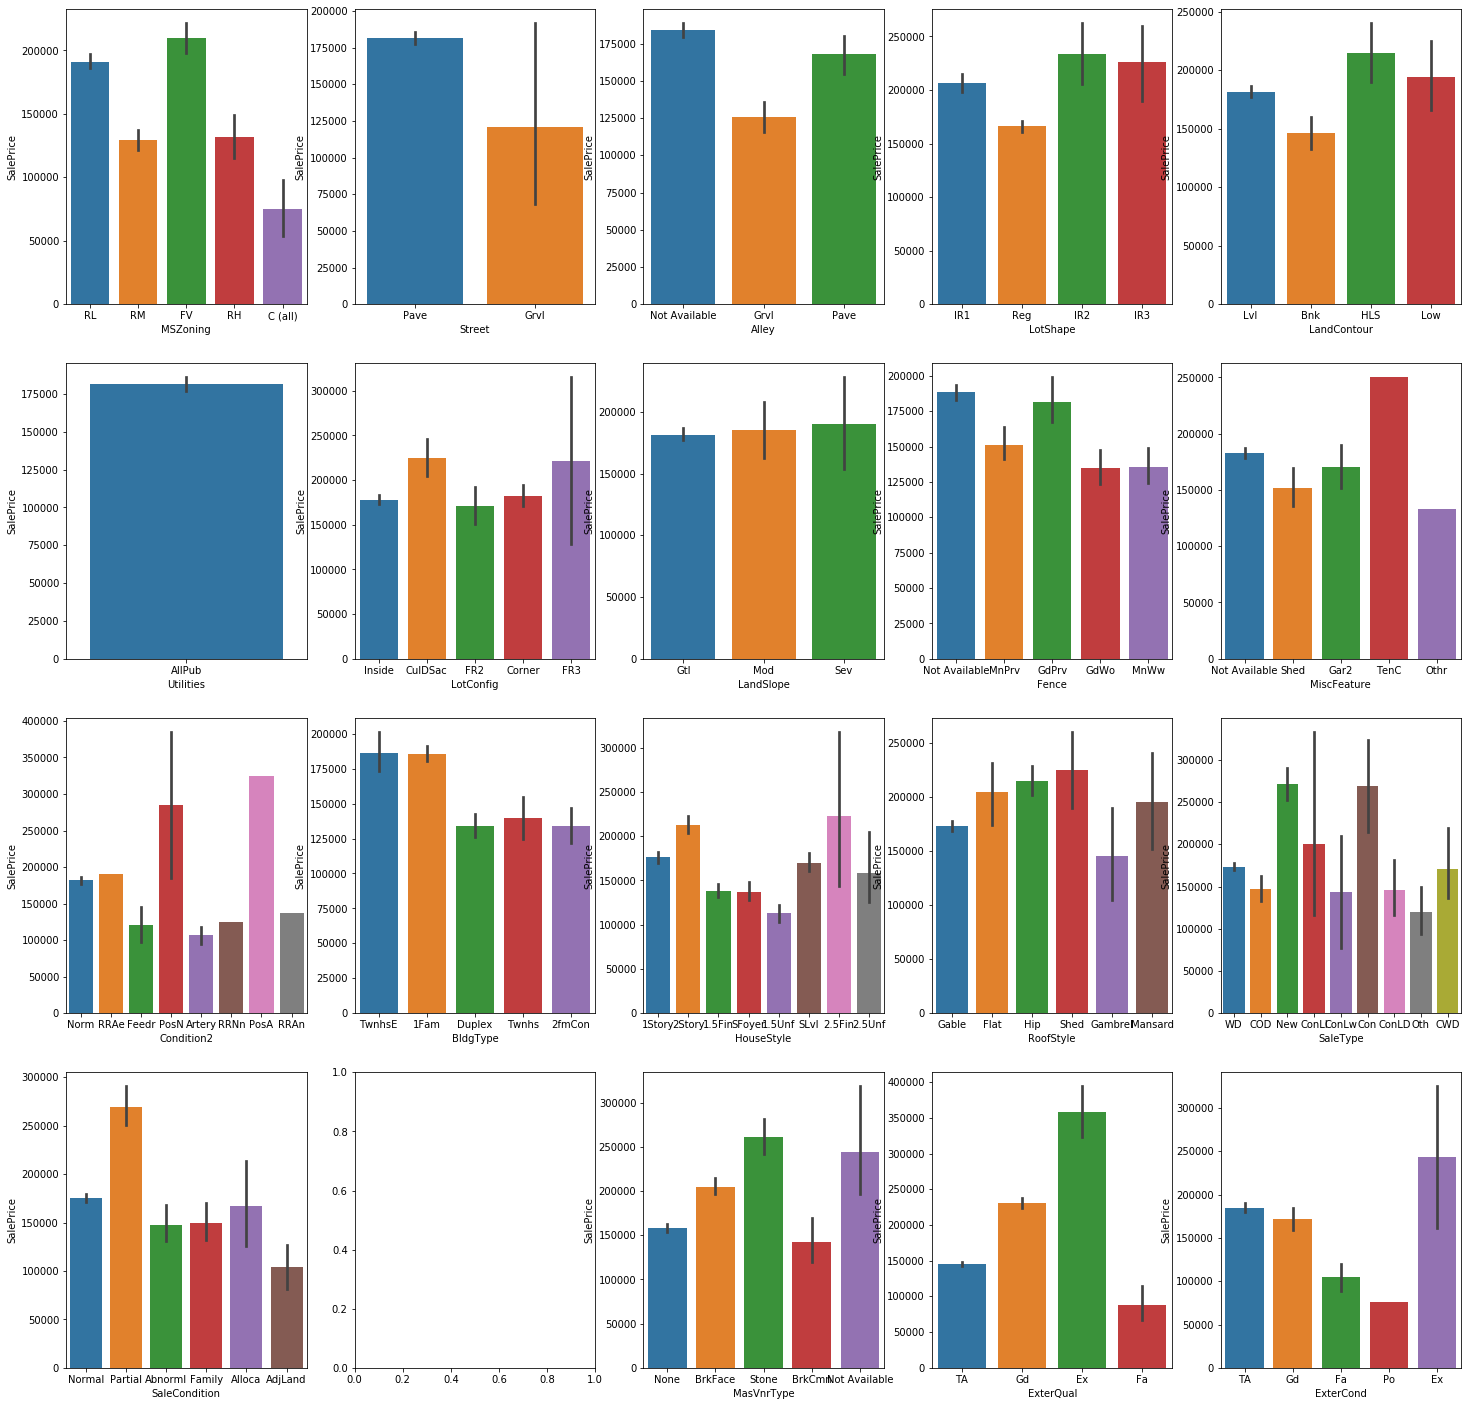

In [554]:
fig, ((ax1, ax2, ax3,ax4, ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15),(ax16,ax17,ax18,ax19,ax20)) = plt.subplots(nrows=4, ncols=5, figsize = (25,25))

sns.barplot(x=train_df['MSZoning'],y=train_df['SalePrice'],ax=ax1)


sns.barplot(x=train_df['Street'],y=train_df['SalePrice'],ax=ax2)
sns.barplot(x=train_df['Alley'],y=train_df['SalePrice'],ax=ax3)
sns.barplot(x=train_df['LotShape'],y=train_df['SalePrice'],ax=ax4)
sns.barplot(x=train_df['LandContour'],y=train_df['SalePrice'],ax=ax5)

sns.barplot(x=train_df['Utilities'],y=train_df['SalePrice'],ax=ax6)
sns.barplot(x=train_df['LotConfig'],y=train_df['SalePrice'],ax=ax7)
sns.barplot(x=train_df['LandSlope'],y=train_df['SalePrice'],ax=ax8)
sns.barplot(x=train_df['Fence'],y=train_df['SalePrice'],ax=ax9)
sns.barplot(x=train_df['MiscFeature'],y=train_df['SalePrice'],ax=ax10)

sns.barplot(x=train_df['Condition2'],y=train_df['SalePrice'],ax=ax11)
sns.barplot(x=train_df['BldgType'],y=train_df['SalePrice'],ax=ax12)
sns.barplot(x=train_df['HouseStyle'],y=train_df['SalePrice'],ax=ax13)
sns.barplot(x=train_df['RoofStyle'],y=train_df['SalePrice'],ax=ax14)
sns.barplot(x=train_df['SaleType'],y=train_df['SalePrice'],ax=ax15)

sns.barplot(x=train_df['SaleCondition'],y=train_df['SalePrice'],ax=ax16)
#sns.barplot(x=train_df['Exterior2nd'],y=train_df['SalePrice'],ax=ax17)
sns.barplot(x=train_df['MasVnrType'],y=train_df['SalePrice'],ax=ax18)
sns.barplot(x=train_df['ExterQual'],y=train_df['SalePrice'],ax=ax19)
sns.barplot(x=train_df['ExterCond'],y=train_df['SalePrice'],ax=ax20)

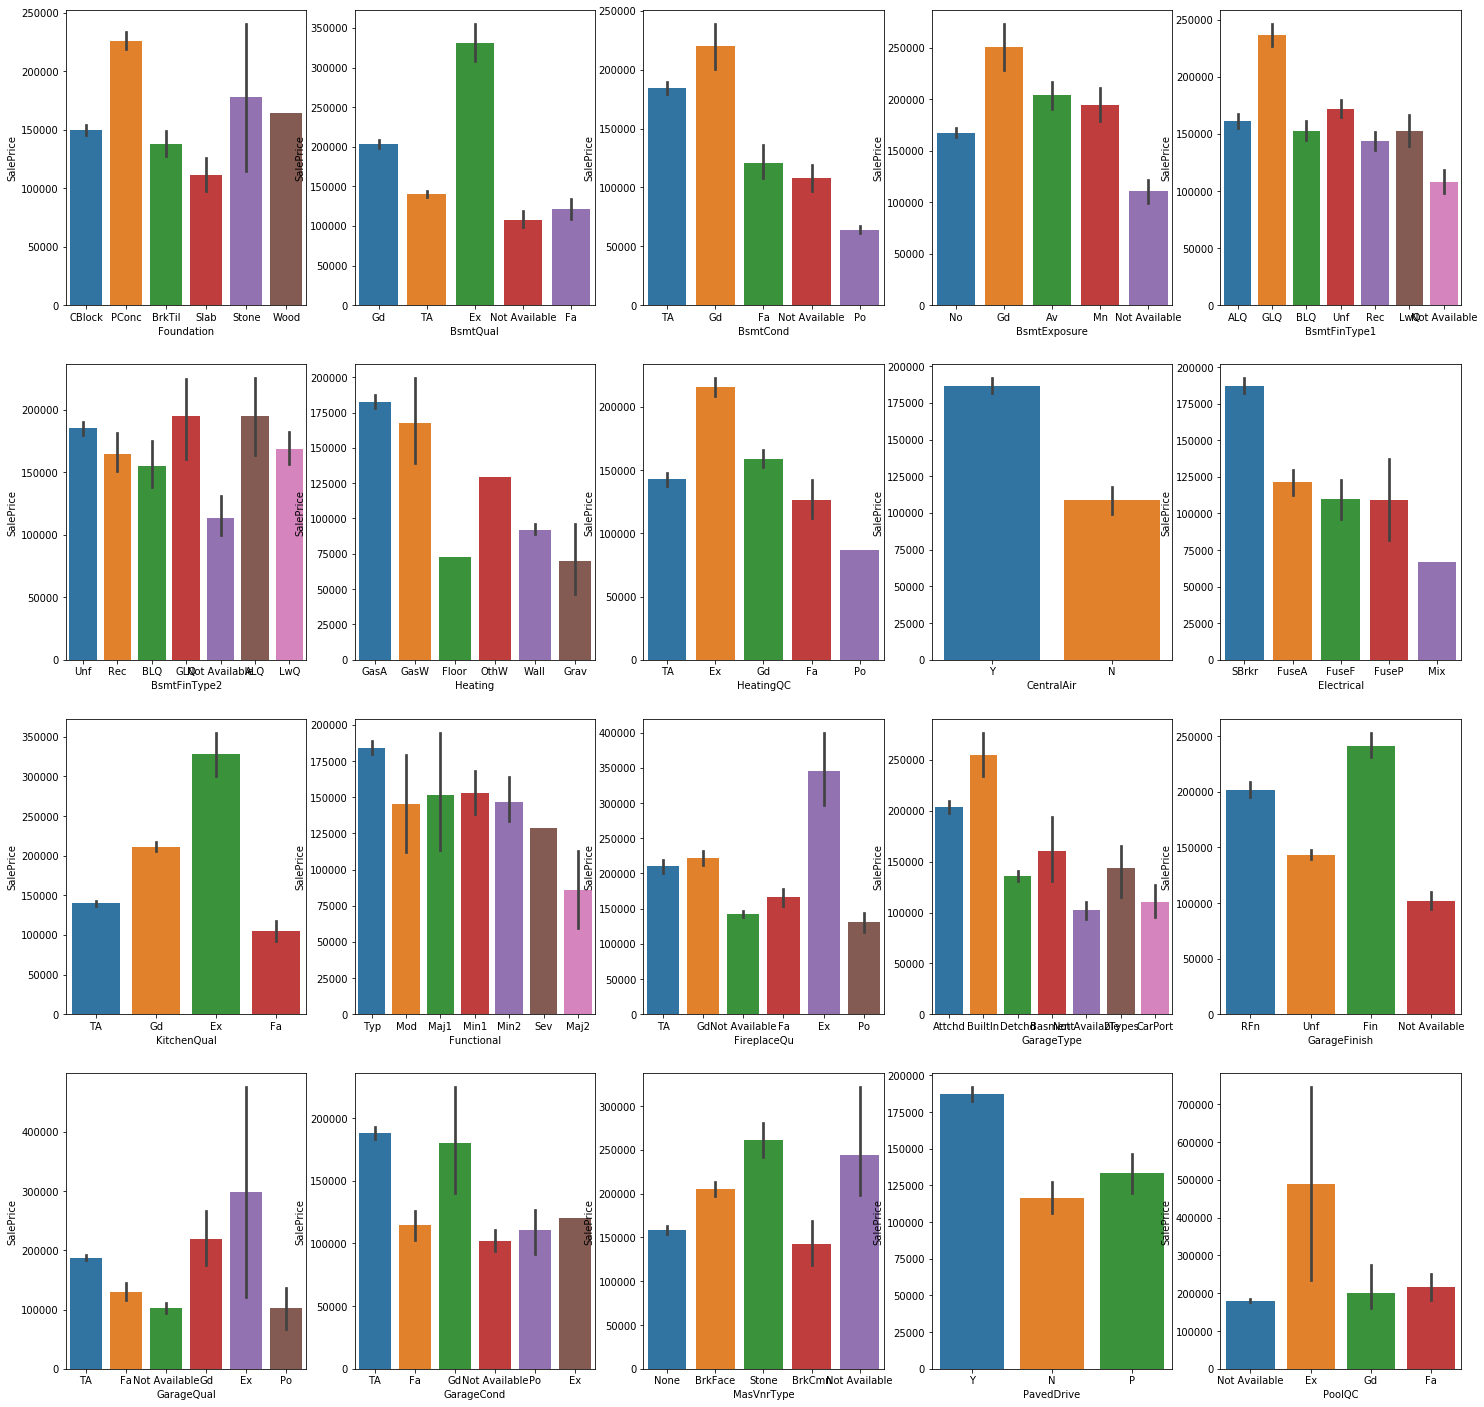

In [555]:
fig, ((ax1, ax2, ax3,ax4, ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15),(ax16,ax17,ax18,ax19,ax20)) = plt.subplots(nrows=4, ncols=5, figsize = (25,25))

sns.barplot(x=train_df['Foundation'],y=train_df['SalePrice'],ax=ax1)


sns.barplot(x=train_df['BsmtQual'],y=train_df['SalePrice'],ax=ax2)
sns.barplot(x=train_df['BsmtCond'],y=train_df['SalePrice'],ax=ax3)
sns.barplot(x=train_df['BsmtExposure'],y=train_df['SalePrice'],ax=ax4)
sns.barplot(x=train_df['BsmtFinType1'],y=train_df['SalePrice'],ax=ax5)

sns.barplot(x=train_df['BsmtFinType2'],y=train_df['SalePrice'],ax=ax6)
sns.barplot(x=train_df['Heating'],y=train_df['SalePrice'],ax=ax7)
sns.barplot(x=train_df['HeatingQC'],y=train_df['SalePrice'],ax=ax8)
sns.barplot(x=train_df['CentralAir'],y=train_df['SalePrice'],ax=ax9)
sns.barplot(x=train_df['Electrical'],y=train_df['SalePrice'],ax=ax10)

sns.barplot(x=train_df['KitchenQual'],y=train_df['SalePrice'],ax=ax11)
sns.barplot(x=train_df['Functional'],y=train_df['SalePrice'],ax=ax12)
sns.barplot(x=train_df['FireplaceQu'],y=train_df['SalePrice'],ax=ax13)
sns.barplot(x=train_df['GarageType'],y=train_df['SalePrice'],ax=ax14)
sns.barplot(x=train_df['GarageFinish'],y=train_df['SalePrice'],ax=ax15)

sns.barplot(x=train_df['GarageQual'],y=train_df['SalePrice'],ax=ax16)
sns.barplot(x=train_df['GarageCond'],y=train_df['SalePrice'],ax=ax17)
sns.barplot(x=train_df['MasVnrType'],y=train_df['SalePrice'],ax=ax18)
sns.barplot(x=train_df['PavedDrive'],y=train_df['SalePrice'],ax=ax19)
sns.barplot(x=train_df['PoolQC'],y=train_df['SalePrice'],ax=ax20)

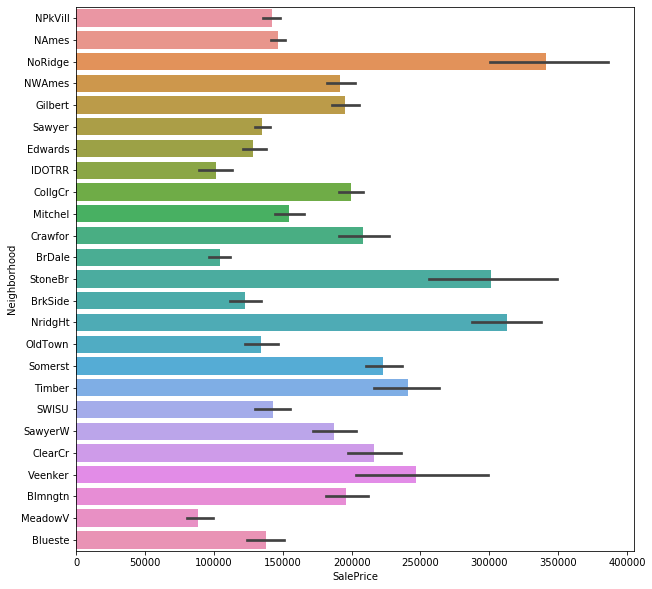

In [556]:
plt.figure(figsize=(10,10))
sns.barplot(y=train_df['Neighborhood'],x=train_df['SalePrice'])

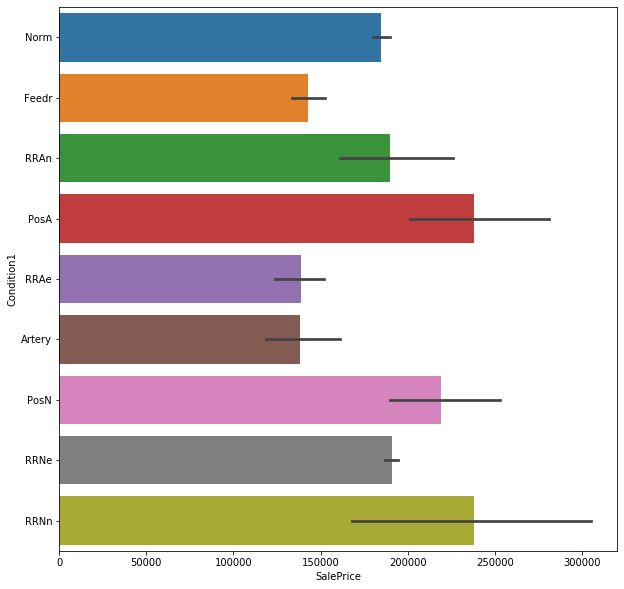

In [557]:
plt.figure(figsize=(10,10))
sns.barplot(y=train_df['Condition1'],x=train_df['SalePrice'])

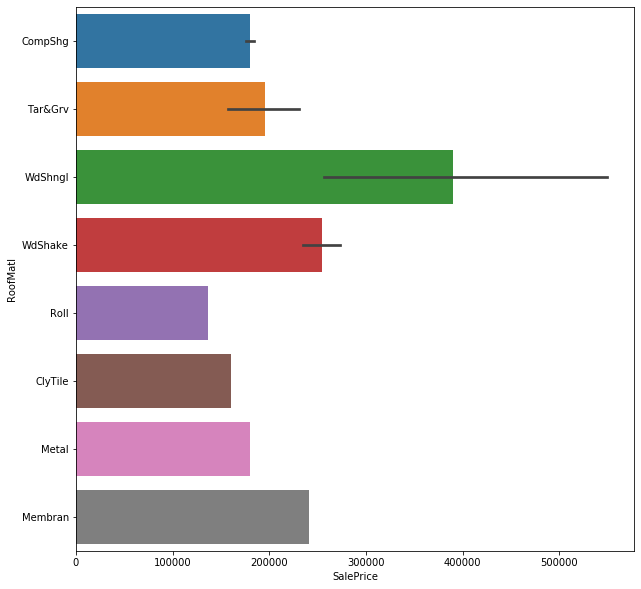

In [558]:
plt.figure(figsize=(10,10))
sns.barplot(y=train_df['RoofMatl'],x=train_df['SalePrice'])

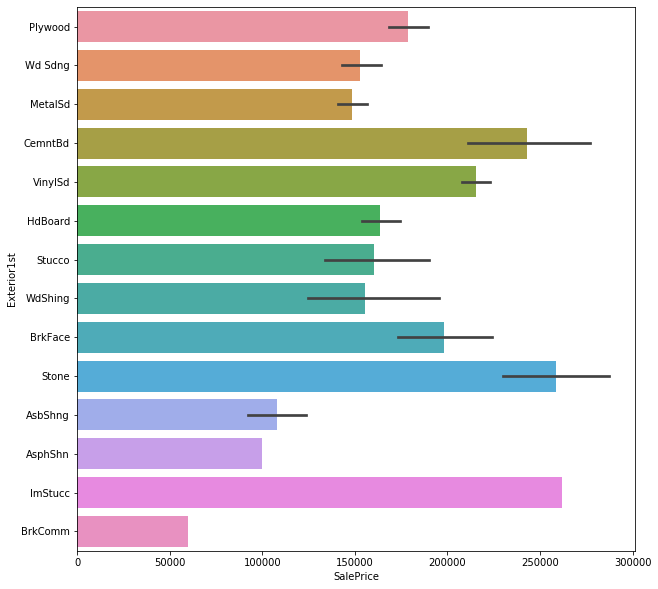

In [559]:
plt.figure(figsize=(10,10))
sns.barplot(y=train_df['Exterior1st'],x=train_df['SalePrice'])

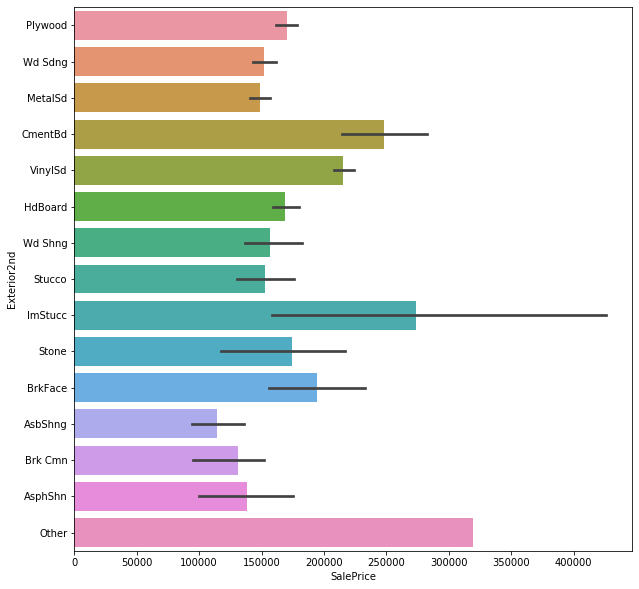

In [560]:
plt.figure(figsize=(10,10))
sns.barplot(y=train_df['Exterior2nd'],x=train_df['SalePrice'])

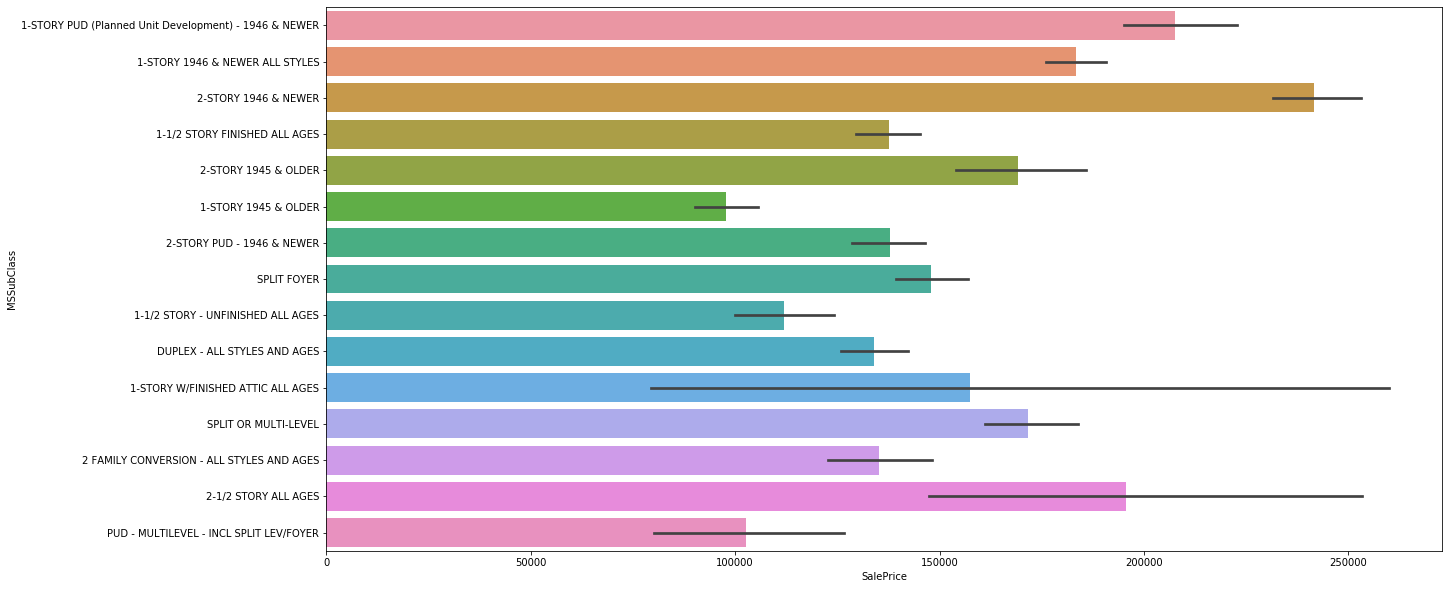

In [561]:
plt.figure(figsize=(20,10))
sns.barplot(y=train_df['MSSubClass'],x=train_df['SalePrice'])

observation:
1)Floating Village Residential,Residential Low Density has high sales price and commercial buildings has less price

2)properties with paved streets has high sales prices compared to gravel roads

3)properties with paved alleys has high sales prices.

4)regular shaped properties has less price
moderately irregular properties has high prices

5)hill side properties has high sales price

6)the data we collected every building has all the utilities.

7)properties with Cul-de-sac kind of lot configuration has high sale price

8)properties with moderate to severe slope has high sale prices

9) properties in Northridge,Northridge Heights,Stone Brook locations tops in sales prices

10)properties within Within 200' of North-South Railroad has highest price followed by properties with Adjacency to postive off-site feature

11)Townhouse Inside Unit,Single-family Detached type of properties has high sale prices

12)Two and one-half story properties with  2nd level finished has high sale prices followed by 2 story buildings

13)properties with shed type of roofs has high sale prices followed by hip and flat roofs.

14)properties which just got constructed has high sale prices and properties with  15% Contract Down payment regular terms has also high sale prices.

15)Homes that are partially constructed during last assessment has high sale prices.

16)properties with stone type of Masonry veneers has high prices.

17)properties with excellent exterior material quality and excellent exterior condition has higher sale prices.

18)properties with poured concrete type of foundation has high sale prices.

19)properties with basement height of 100+ inches has high sale price

20)properties with good basement condition has higher sale price where as properties with poor basement condition has low price

21)properties with good exposure to walkout or garden level walls has high sales price

22)properties with Good Living Quarters has high sales prices

23)properties with Gas forced warm air furnace and Gas hot water or steam heat has high sale prices.

24)properties with ecellent heating conditions tend to have high prices

25)properties with central air conditioning has high sales prices.

26)properties with Standard Circuit Breakers & Romex has high sales values

27)properties with excellent kitchen quality has high price.

28)typical functioning homes has high sale price.

29)properties with excellent fireplace quality has high price.

30)properties with built in garages has high salesprice followed by attached garages.properties which do not have any garage has less sales price

31)If the interior of garage is completely finished,those properties have high sale price

32)properties with garages in good condition with excellent quality has high sale prices.

33)properties with paved drive ways has high sales prices.

34)properties with excellent pool quality has high prices

35)properties with 2-STORY  built in 1946 or NEWER has high sales prices.

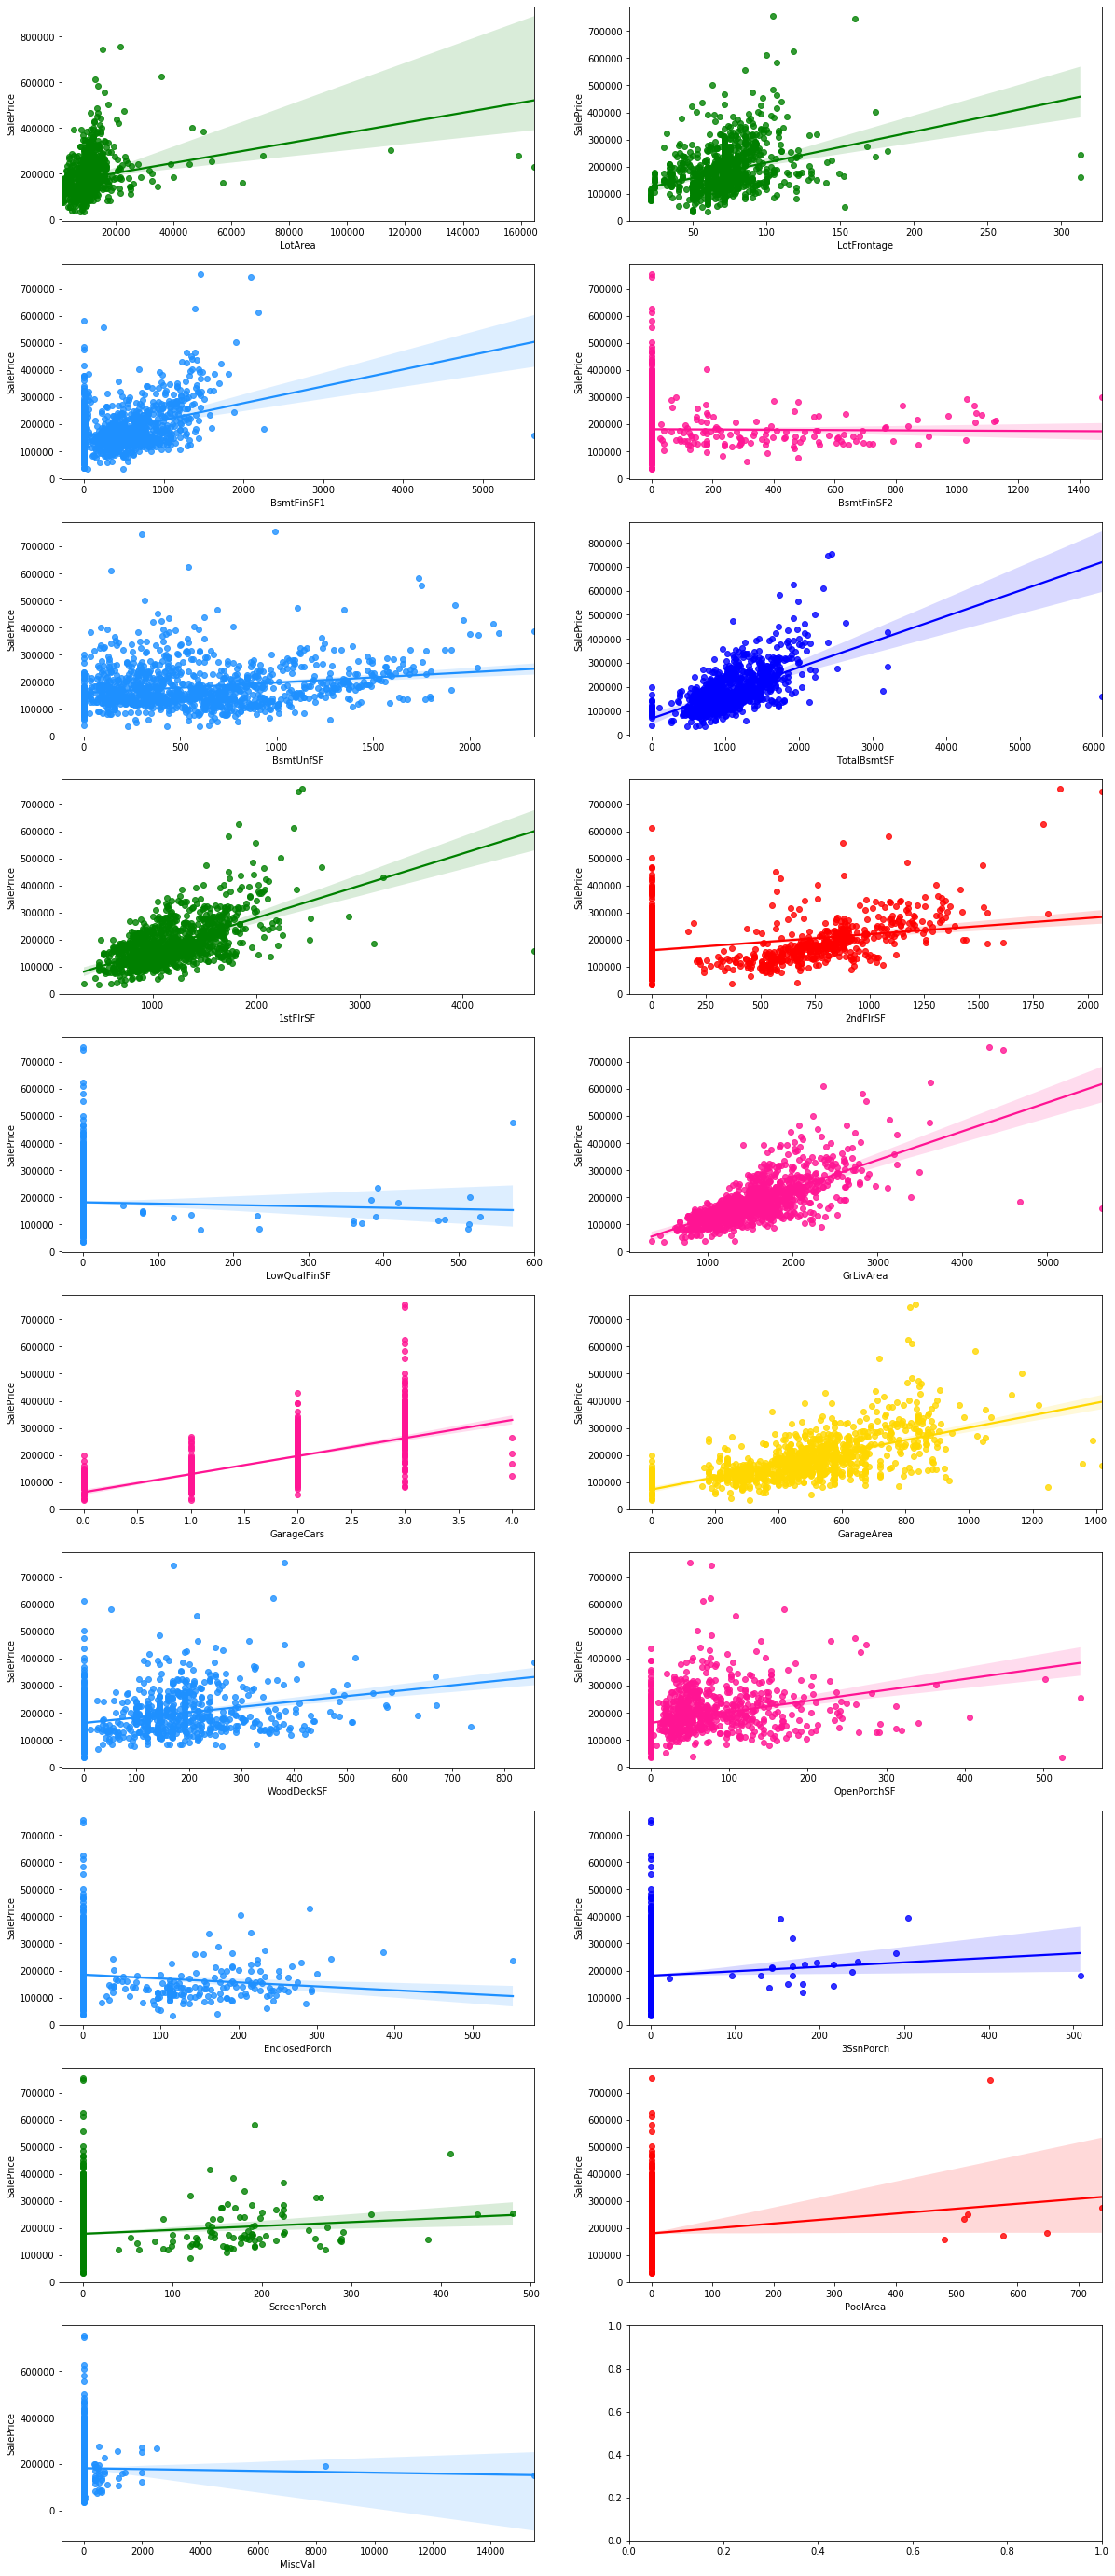

In [566]:
#checking  of numeric columns

fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6),(ax7, ax8),( ax9,ax10),(ax11,ax12), (ax13, ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20)) = plt.subplots(nrows=10, ncols=2, figsize = (20,50))



sns.regplot(x=train_df['LotArea'] , y=train_df['SalePrice'],color="g",ax=ax1)
sns.regplot(x=train_df['LotFrontage'] , y=train_df['SalePrice'],color="g",ax=ax2)

sns.regplot(x=train_df['BsmtFinSF1'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax3)
sns.regplot(x=train_df['BsmtFinSF2'] ,y=train_df['SalePrice'], color="deeppink",ax=ax4)
sns.regplot(x=train_df['BsmtUnfSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax5)
sns.regplot(x=train_df['TotalBsmtSF'] , y=train_df['SalePrice'],color="b",ax=ax6)
sns.regplot(x=train_df['1stFlrSF'] , y=train_df['SalePrice'],color="g",ax=ax7)
sns.regplot(x=train_df['2ndFlrSF'] , y=train_df['SalePrice'],color="r",ax=ax8)
sns.regplot(x=train_df['LowQualFinSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax9)
sns.regplot(x=train_df['GrLivArea'] , y=train_df['SalePrice'],color="deeppink",ax=ax10)
sns.regplot(x=train_df['GarageCars'] ,y=train_df['SalePrice'], color="deeppink",ax=ax11)
sns.regplot(x=train_df['GarageArea'] , y=train_df['SalePrice'],color="gold",ax=ax12)
sns.regplot(x=train_df['WoodDeckSF'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax13)
sns.regplot(x=train_df['OpenPorchSF'] , y=train_df['SalePrice'],color="deeppink",ax=ax14)
sns.regplot(x=train_df['EnclosedPorch'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax15)
sns.regplot(x=train_df['3SsnPorch'] , y=train_df['SalePrice'],color="b",ax=ax16)
sns.regplot(x=train_df['ScreenPorch'] ,y=train_df['SalePrice'], color="g",ax=ax17)
sns.regplot(x=train_df['PoolArea'] , y=train_df['SalePrice'],color="r",ax=ax18)
sns.regplot(x=train_df['MiscVal'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax19)



# LABEL ENCODING:

In [567]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [568]:
for i in train_objcols:
    train_df[i]= le.fit_transform(train_df[i].values)

In [569]:
for i in test_objcols:
    test_df[i]= le.fit_transform(test_df[i].values)

In [570]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,4,3,70.98847,4928,1,1,0,3,0,4,...,1,0,2,8,4,128000,34,34,3,33.0
1,3,3,95.00000,15865,1,1,0,3,0,4,...,1,0,10,8,4,268000,40,40,3,40.0
2,9,3,92.00000,9920,1,1,0,3,0,1,...,1,0,6,8,4,269790,14,13,3,13.0
3,3,3,105.00000,11751,1,1,0,3,0,4,...,1,0,1,0,4,190000,33,33,0,33.0
4,3,3,70.98847,16635,1,1,0,3,0,2,...,1,0,6,8,4,215000,33,10,1,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3,3,70.98847,9819,1,1,0,3,0,4,...,1,0,2,8,4,122000,43,43,0,40.0
1164,3,3,67.00000,8777,1,1,3,3,0,4,...,1,0,5,8,4,108000,61,7,1,8.0
1165,10,3,24.00000,2280,1,1,3,3,0,2,...,1,0,7,8,4,148500,34,34,1,34.0
1166,8,0,50.00000,8500,1,2,3,3,0,4,...,1,0,7,8,4,40000,90,60,2,90.0


In [571]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,3,2,86.000000,14157,1,1,0,1,0,0,...,4,0,0,7,5,2,4,4,3,5.0
1,4,2,66.425101,5814,1,1,0,3,0,1,...,4,0,0,8,0,0,25,26,1,26.0
2,3,2,66.425101,11838,1,1,3,3,0,4,...,4,0,0,6,5,2,8,9,1,9.0
3,8,2,75.000000,12000,1,1,3,0,0,4,...,4,0,0,7,5,2,68,60,1,69.0
4,9,2,86.000000,14598,1,1,0,3,0,1,...,4,0,0,1,5,2,2,3,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3,2,78.000000,10206,1,1,3,3,0,4,...,4,0,0,10,5,2,2,3,2,3.0
288,3,2,57.000000,9245,1,1,1,3,0,4,...,4,0,0,2,5,2,15,15,2,14.0
289,3,2,66.425101,11241,1,1,0,3,0,1,...,4,2,700,3,5,2,39,40,0,40.0
290,1,3,50.000000,5000,1,1,3,3,0,0,...,4,0,0,10,5,2,62,60,4,60.0


In [572]:
test_df['PoolQC']

0      0
1      0
2      0
3      0
4      0
      ..
287    0
288    0
289    0
290    0
291    0
Name: PoolQC, Length: 292, dtype: int32

In [573]:
train_df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,5.571918,3.013699,70.988470,10484.749144,0.996575,0.995719,1.938356,2.773973,0.0,3.004281,...,1.070205,47.315068,6.344178,7.465753,3.768836,181477.005993,39.069349,25.241438,2.195205,31.806159
std,3.706448,0.633120,22.437056,8957.442311,0.058445,0.256832,1.412262,0.710027,0.0,1.642667,...,0.377430,543.264432,2.686352,1.619459,1.112208,79105.586863,30.145255,20.785185,1.329738,24.198559
min,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,60.000000,7621.500000,1.000000,1.000000,0.000000,3.000000,0.0,2.000000,...,1.000000,0.000000,5.000000,8.000000,4.000000,130375.000000,10.000000,6.000000,1.000000,9.000000
50%,3.000000,3.000000,70.988470,9522.500000,1.000000,1.000000,3.000000,3.000000,0.0,4.000000,...,1.000000,0.000000,6.000000,8.000000,4.000000,163995.000000,38.000000,17.000000,2.000000,31.806159
75%,9.000000,3.000000,79.250000,11515.500000,1.000000,1.000000,3.000000,3.000000,0.0,4.000000,...,1.000000,0.000000,8.000000,8.000000,4.000000,215000.000000,56.000000,44.000000,3.000000,48.000000
max,14.000000,4.000000,313.000000,164660.000000,1.000000,2.000000,3.000000,3.000000,0.0,4.000000,...,4.000000,15500.000000,12.000000,8.000000,5.000000,755000.000000,135.000000,60.000000,4.000000,110.000000


# OUTLIER REMOVAL:

In [574]:
from scipy.stats import zscore

z=np.abs(zscore(train_df))

print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([10, 19, 33, ..., 38, 60, 61], dtype=int64))


In [575]:
df1=train_df[(z<3).all(axis=1)]
print("with outliers::",train_df.shape)
print("After removing outliers::",df1.shape)

with outliers:: (1168, 80)
After removing outliers:: (0, 80)


IQR METHOD

In [576]:
from scipy import stats 
IQR = stats.iqr(train_df) 
IQR 

5.0

In [577]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)

In [578]:
df_out = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(5, 80)


# NOTE:


Both IQR and Z score causes huge data loss.

Another technique is replacing the outlier data with mean or median.But when we obserfve this data set there is a huge difference between minimum and maximum values.If we calculate mean or median it wont give appropriate values as it includes the outlier value(maximum ones).So not using this approach.
 
As we are not dropping the outliers, another approach is capping or winsorization of outliers.

using percentile capping. Values that are less than the value at 10th percentile are replaced by 10th percentile value , and values  greater than 90th percentile are replaced by 90th percentile value.


In [579]:
for i in train_df.columns:
            FloorQ=train_df[i].quantile(0.10)
            CeilQ=train_df[i].quantile(0.90)
            train_df[i] = np.where(train_df[i] <FloorQ,FloorQ,train_df[i])
            train_df[i] = np.where(train_df[i] >CeilQ,CeilQ,train_df[i])
            #checking skewness of each column
            print(i,"->",train_df[i].skew())

MSSubClass -> 0.2763231996830171
MSZoning -> 2.0830205639783603
LotFrontage -> 0.09140893728088621
LotArea -> 0.13022197176194603
Street -> 0
Alley -> 0
LotShape -> -0.6037752483890678
LandContour -> -2.589909046438337
Utilities -> 0
LotConfig -> -1.118821122735627
LandSlope -> 0
Neighborhood -> 0.12403998681014414
Condition1 -> 0
Condition2 -> 0
BldgType -> 2.138398085468056
HouseStyle -> 0.04328965807090152
OverallQual -> 0.7046020834654392
OverallCond -> 1.0826530707035535
RoofStyle -> 1.4825606082024294
RoofMatl -> 0
Exterior1st -> -0.29774855639553294
Exterior2nd -> -0.34941727928323446
MasVnrType -> -0.801491163029031
MasVnrArea -> 1.0877858966029823
ExterQual -> -0.4683732536791335
ExterCond -> -2.2766386679193933
Foundation -> 0.15130882870028628
BsmtQual -> -0.06329729637250263
BsmtCond -> -2.5312287480710256
BsmtExposure -> -1.166986828385308
BsmtFinType1 -> 0.10081103200737304
BsmtFinSF1 -> 0.34855628344455675
BsmtFinType2 -> -2.28142748215115
BsmtFinSF2 -> 2.484900034120171

In [580]:
train_df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.0,1168.000000,1168.000000,1168.0,1168.000000,...,1168.0,1168.0,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,5.339041,3.139555,70.160644,9639.512757,1.0,1.0,1.938356,2.895548,0.0,3.004281,...,1.0,0.0,6.315068,7.713185,4.0,175868.178938,38.039384,25.314212,2.195205,30.276194
std,3.265690,0.346673,12.918069,2753.020414,0.0,0.0,1.412262,0.305977,0.0,1.642667,...,0.0,0.0,2.259523,0.699441,0.0,55085.031512,27.734236,20.703764,1.329738,20.776913
min,1.000000,3.000000,50.000000,5298.300000,1.0,1.0,0.000000,2.000000,0.0,0.000000,...,1.0,0.0,3.000000,6.000000,4.0,107500.000000,4.000000,3.000000,0.000000,4.000000
25%,3.000000,3.000000,60.000000,7621.500000,1.0,1.0,0.000000,3.000000,0.0,2.000000,...,1.0,0.0,5.000000,8.000000,4.0,130375.000000,10.000000,6.000000,1.000000,9.000000
50%,3.000000,3.000000,70.988470,9522.500000,1.0,1.0,3.000000,3.000000,0.0,4.000000,...,1.0,0.0,6.000000,8.000000,4.0,163995.000000,38.000000,17.000000,2.000000,31.806159
75%,9.000000,3.000000,79.250000,11515.500000,1.0,1.0,3.000000,3.000000,0.0,4.000000,...,1.0,0.0,8.000000,8.000000,4.0,215000.000000,56.000000,44.000000,3.000000,48.000000
max,10.000000,4.000000,92.300000,14311.400000,1.0,1.0,3.000000,3.000000,0.0,4.000000,...,1.0,0.0,10.000000,8.000000,4.0,277650.000000,86.000000,60.000000,4.000000,64.000000


Splitting x and y

In [581]:
X= train_df.drop(columns = ['SalePrice'], axis=1)
y= train_df['SalePrice']

In [582]:
#scaling X vlues
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(X)

In [583]:
#skewness removal
from sklearn.preprocessing import power_transform

X=power_transform(X,method='yeo-johnson')

In [627]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression


import warnings
warnings.simplefilter('ignore')

In [585]:
#finding best random state
best_Randstate=0
accuracy=0
model=[LinearRegression(),Lasso(),Ridge()]
for m in model:
            for i in range(20,200):
                                    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=i)
                                    m.fit(x_train,y_train)
                                    predicted_y=m.predict(x_test)
                                    accu_temp=r2_score(y_test,predicted_y)
                                    if(accu_temp>accuracy):
                                                accuracy=accu_temp
                                                best_Randstate=i
            print("Acuuracy of ",accuracy,"for Model::",m,"found in Random state:",best_Randstate)

Acuuracy of  0.8816937020948621 for Model:: LinearRegression() found in Random state: 84
Acuuracy of  0.8817570941630396 for Model:: Lasso() found in Random state: 84
Acuuracy of  0.8819554886385341 for Model:: Ridge() found in Random state: 84


In [586]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=84)

# LINEAR REGRESSION

In [628]:
lr=LinearRegression()
lr_score=cross_val_score(lr,X,y,cv=5,scoring='r2')
print("Cross validation score:",np.mean(lr_score))
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Accuracy ::",r2_score(y_test,y_pred)*100)
print("Train accuracy:",lr.score(x_train,y_train))
print("Test accuracy:",lr.score(x_test,y_test))
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error::",mean_squared_error(y_test,y_pred))

Cross validation score: 0.8449430282863029
Accuracy :: 88.1693702094862
Train accuracy: 0.8522002886925997
Test accuracy: 0.8816937020948621
mean absolute error: 14682.968026160823
mean squared error:: 371821263.99942046


In [629]:
c=train_df.drop(columns = ['SalePrice'], axis=1)
cols=c.columns
features=lr.coef_



In [589]:
imp_df=pd.DataFrame({"Coefficient":features,"columns":cols})
imp_df=imp_df.sort_values('Coefficient',ascending=False)

In [590]:
imp_df.head(10)

,Coefficient,columns
5,3.378983e+16,Alley
4,8.239924e+15,Street
13,2.128684e+15,Condition2
19,3.683259e+13,RoofMatl
36,1.655535e+12,Heating
38,3.865730e+11,CentralAir
42,4.874361e+09,LowQualFinSF
43,2.020600e+04,GrLivArea
35,9.324000e+03,TotalBsmtSF
16,6.965875e+03,OverallQual


In [591]:
imp_df.tail(10)

,Coefficient,columns
20,-5.306000e+03,Exterior1st
76,-5.450000e+03,Year_SinceRemodAdded
75,-5.902000e+03,Year_SinceBuilt
52,-4.308969e+04,Functional
49,-2.573365e+06,KitchenAbvGr
45,-1.022655e+08,BsmtHalfBath
39,-1.620107e+10,Electrical
10,-1.913907e+15,LandSlope
12,-4.423414e+15,Condition1
8,-1.562908e+16,Utilities


# LASSO REGRESSION

In [630]:
ls=Lasso()
ls_score=cross_val_score(ls,X,y,cv=5,scoring='r2')
print("Cross validation score:",np.mean(ls_score))
ls.fit(x_train,y_train)
y_pred=ls.predict(x_test)
print("Accuracy ::",r2_score(y_test,y_pred)*100)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error::",mean_squared_error(y_test,y_pred))
print("Train accuracy:",ls.score(x_train,y_train))
print("Test accuracy:",ls.score(x_test,y_test))

Cross validation score: 0.8449479206638193
Accuracy :: 88.17570941630396
mean absolute error: 14678.429774135926
mean squared error:: 371622030.9971658
Train accuracy: 0.8522005697301187
Test accuracy: 0.8817570941630396


# RIDGE REGRESSION

In [631]:
rg=Ridge()
rg_score=cross_val_score(rg,X,y,cv=5,scoring='r2')
print("Cross validation score:",np.mean(rg_score))
rg.fit(x_train,y_train)
y_pred=rg.predict(x_test)
print("Accuracy ::",r2_score(y_test,y_pred)*100)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error::",mean_squared_error(y_test,y_pred))
print("Train accuracy:",rg.score(x_train,y_train))
print("Test accuracy:",rg.score(x_test,y_test))

Cross validation score: 0.8450301816295296
Accuracy :: 88.19554886385342
mean absolute error: 14666.86419322152
mean squared error:: 370998503.0366506
Train accuracy: 0.8521965802636385
Test accuracy: 0.8819554886385341


# HYPER PARAMETER TUNING

In [594]:
from sklearn.model_selection import GridSearchCV


In [595]:
params = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}
lasso = Lasso()

# cross validation
laso_grid = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = 10, 
                        return_train_score=True,
                        verbose = 1)            

laso_grid.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             return_train_score=True, scoring='r2', verbose=1)

In [596]:
laso_grid.best_params_

{'alpha': 1}

In [597]:
ls1=Lasso(alpha=1)
ls1.fit(x_train,y_train)
y_pred=ls1.predict(x_test)
print("Accuracy ::",r2_score(y_test,y_pred)*100)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error::",mean_squared_error(y_test,y_pred))

Accuracy :: 88.17570941630396
mean absolute error: 14678.429774135926
mean squared error:: 371622030.9971658


In [599]:
c=train_df.drop(columns = ['SalePrice'], axis=1)
cols=c.columns
features=ls1.coef_

In [600]:
Ls1Ftrs_df=pd.DataFrame({"Coefficient":features,"columns":cols})
Ls1Ftrs_df=Ls1Ftrs_df.sort_values('Coefficient',ascending=False)

In [601]:
Ls1Ftrs_df.head(10)

,Coefficient,columns
43,20192.484667,GrLivArea
35,9324.454165,TotalBsmtSF
16,6975.617288,OverallQual
53,5404.183371,Fireplaces
32,5110.893892,BsmtFinType2
33,4862.826406,BsmtFinSF2
58,3519.981182,GarageArea
21,3325.836033,Exterior2nd
3,3188.277490,LotArea
78,2766.374206,GarageBlt_since


In [602]:
Ls1Ftrs_df.tail(10)

,Coefficient,columns
50,-2310.811064,KitchenQual
51,-2376.660125,TotRmsAbvGrd
48,-2458.709575,BedroomAbvGr
27,-2566.476984,BsmtQual
54,-2932.597308,FireplaceQu
14,-3556.088257,BldgType
24,-3619.244714,ExterQual
20,-5282.406714,Exterior1st
76,-5452.982792,Year_SinceRemodAdded
75,-5886.440421,Year_SinceBuilt


# Ridge Regression hyper parameter

In [603]:

param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

ridge = Ridge()

ridge_grid = GridSearchCV(estimator=ridge,
                        param_grid=param,
                        scoring='r2',
                        cv=10,
                        verbose=1,
                        return_train_score=True)

ridge_grid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [604]:
ridge_grid.best_params_

{'alpha': 20.0}

In [605]:
rg1=Ridge(alpha=20)
rg1.fit(x_train,y_train)
y_pred=rg1.predict(x_test)
print("Accuracy ::",r2_score(y_test,y_pred)*100)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error::",mean_squared_error(y_test,y_pred))

Accuracy :: 88.439238738436
mean absolute error: 14547.094319408572
mean squared error:: 363339648.11551946


In [606]:
c=train_df.drop(columns = ['SalePrice'], axis=1)
cols=c.columns
features=rg1.coef_

In [607]:
Rg1Ftrs_df=pd.DataFrame({"Coefficient":features,"columns":cols})
Rg1Ftrs_df=Rg1Ftrs_df.sort_values('Coefficient',ascending=False)

In [608]:
Rg1Ftrs_df.head(10)

,Coefficient,columns
43,15914.762161,GrLivArea
35,8313.753138,TotalBsmtSF
16,6834.095409,OverallQual
53,5437.633798,Fireplaces
41,4294.495658,2ndFlrSF
33,3680.489136,BsmtFinSF2
32,3410.732693,BsmtFinType2
58,3374.414213,GarageArea
3,3144.774971,LotArea
21,2460.984954,Exterior2nd


In [609]:
Rg1Ftrs_df.tail(10)

,Coefficient,columns
56,-1989.097735,GarageFinish
48,-2248.562179,BedroomAbvGr
50,-2449.011919,KitchenQual
27,-2669.349478,BsmtQual
54,-2879.775726,FireplaceQu
14,-3413.339251,BldgType
24,-3834.106685,ExterQual
20,-4259.136891,Exterior1st
75,-4763.858412,Year_SinceBuilt
76,-5143.892805,Year_SinceRemodAdded


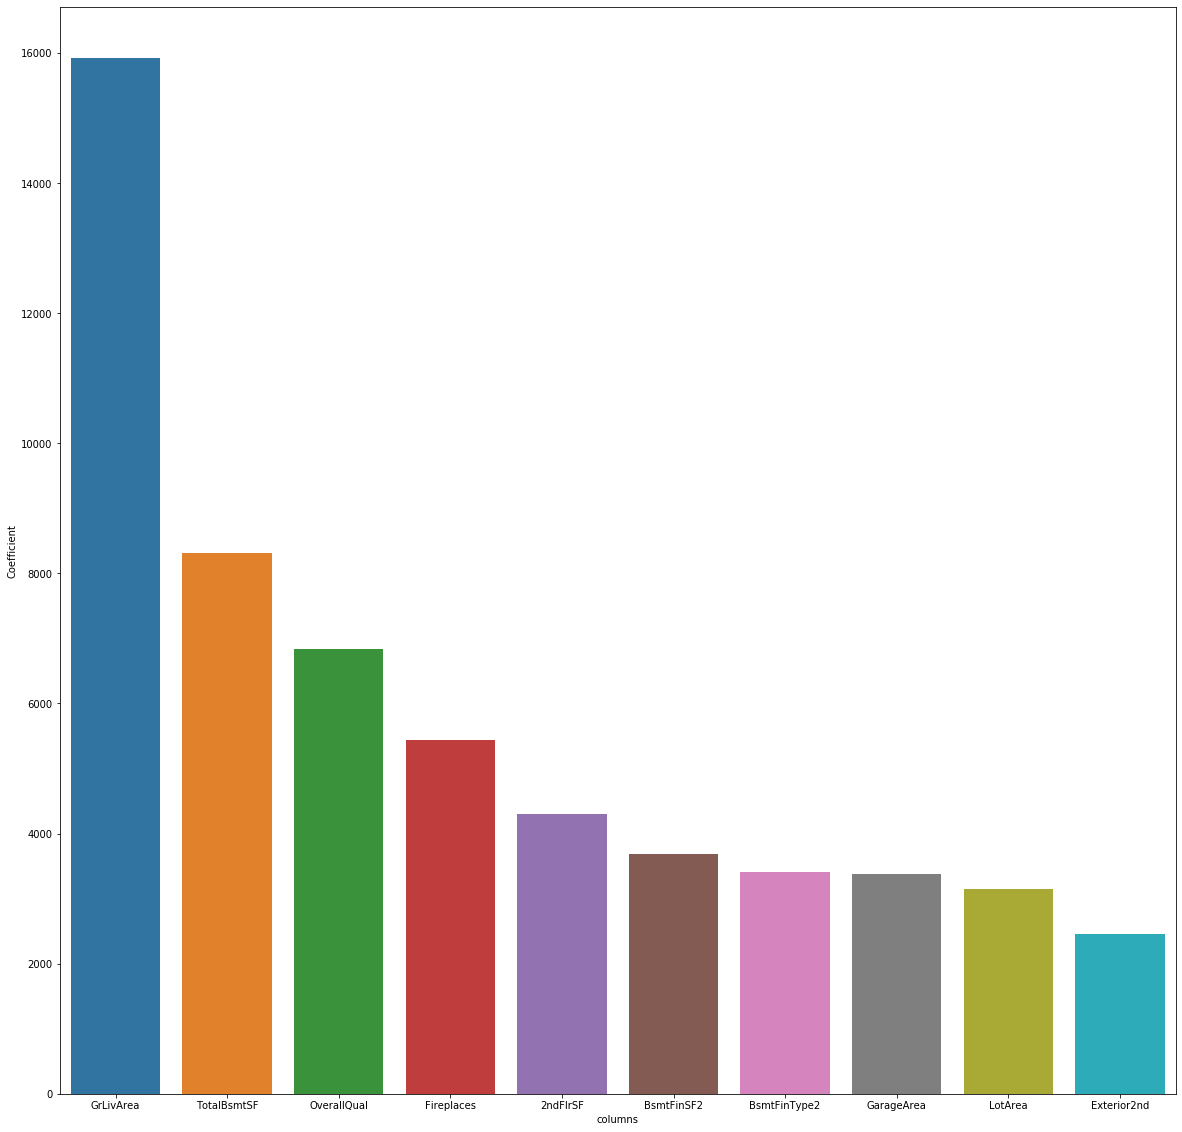

In [620]:
# Barplot for attributes that positively affect the sale price
plt.figure(figsize=(20,20))
sns.barplot(y=Rg1Ftrs_df['Coefficient'][0:10],x=Rg1Ftrs_df['columns'][0:10])

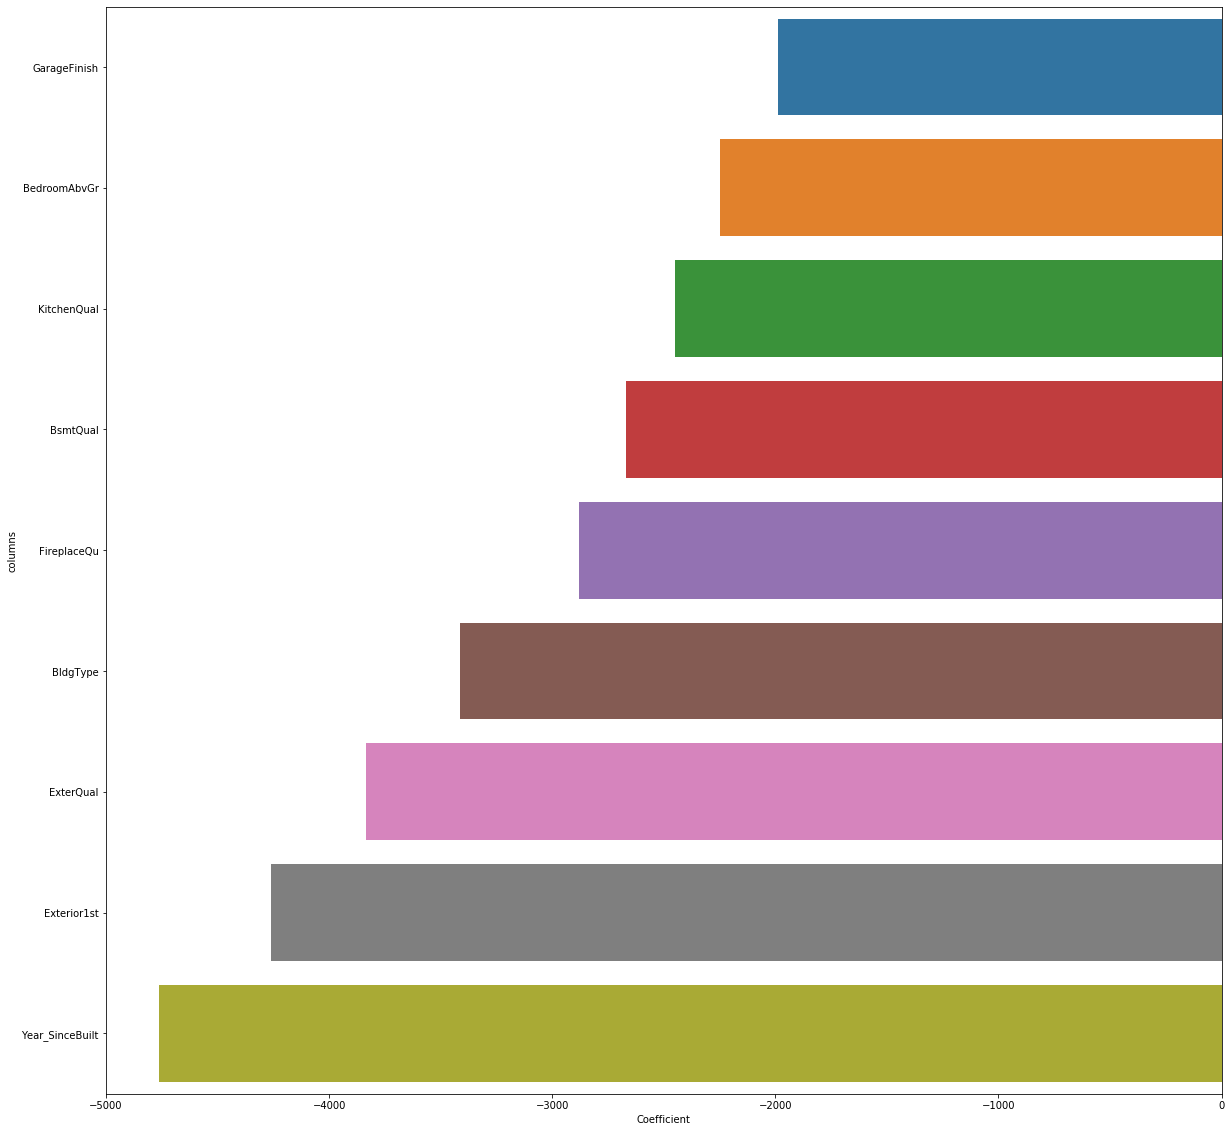

In [623]:
# Barplot for attributes that negatively affect the sale price
plt.figure(figsize=(20,20))
sns.barplot(x=Rg1Ftrs_df['Coefficient'][-10:-1],y=Rg1Ftrs_df['columns'][-10:-1])

# SAVING MODEL:

In [610]:
import joblib

In [611]:
filename='HousingProject_salesprediction.obj'

In [612]:
joblib.dump(rg1,open(filename,'wb'))

# Predicting on test data

In [613]:
predicting_model=joblib.load(open('HousingProject_salesprediction.obj','rb'))+

In [614]:
predicting_model

Ridge(alpha=20)

In [615]:
result=predicting_model.predict(test_df)

In [616]:
#saving predicted result to  csv

prediction = pd.DataFrame(result, columns=['Sales Price']).to_csv('HousingProject_salesprediction.csv')